In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
shapefile = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B399. 서울시 행정동단위 장애인 등급별 현황 공간데이터/2. 파일데이터/2019/TL_DSPSN_DEG_ST_2020.shp")

In [3]:
shapefile

,ID,BR_YY,GU_NAM,ADM_DR_NM,SD_MN,SD_WN,MD_MN,MD_WN,MN_D_ALL,WN_D_ALL,D_ALL,geometry
0,6.0,2019,구로구,항동,0,0,0,0,0,0,0,"POLYGON ((185119.199 542037.667, 185031.456 54..."
1,350.0,2019,강북구,수유제3동,235,140,389,330,624,470,1094,"POLYGON ((202088.922 560579.420, 202088.174 56..."
2,18.0,2019,강북구,수유제2동,243,178,371,324,614,502,1116,"POLYGON ((202088.922 560579.420, 201992.344 56..."
3,137.0,2019,강북구,우이동,190,152,369,292,559,444,1003,"POLYGON ((201383.929 560591.485, 201333.054 56..."
4,349.0,2019,강북구,인수동,384,279,635,523,1019,802,1821,"POLYGON ((201383.929 560591.485, 201384.280 56..."
...,...,...,...,...,...,...,...,...,...,...,...,...
420,324.0,2019,용산구,원효로제2동,89,85,165,129,254,214,468,"POLYGON ((196520.339 548473.187, 196532.314 54..."
421,378.0,2019,동대문구,휘경제1동,141,86,242,203,383,289,672,"POLYGON ((206128.063 555084.522, 206128.594 55..."
422,95.0,2019,중랑구,망우제3동,182,170,387,242,569,412,981,"POLYGON ((209919.866 554693.374, 209901.060 55..."
423,366.0,2019,중랑구,묵제2동,180,129,344,252,524,381,905,"POLYGON ((206950.542 556200.323, 206933.567 55..."


In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'The number of disabled individuals by residental unit')

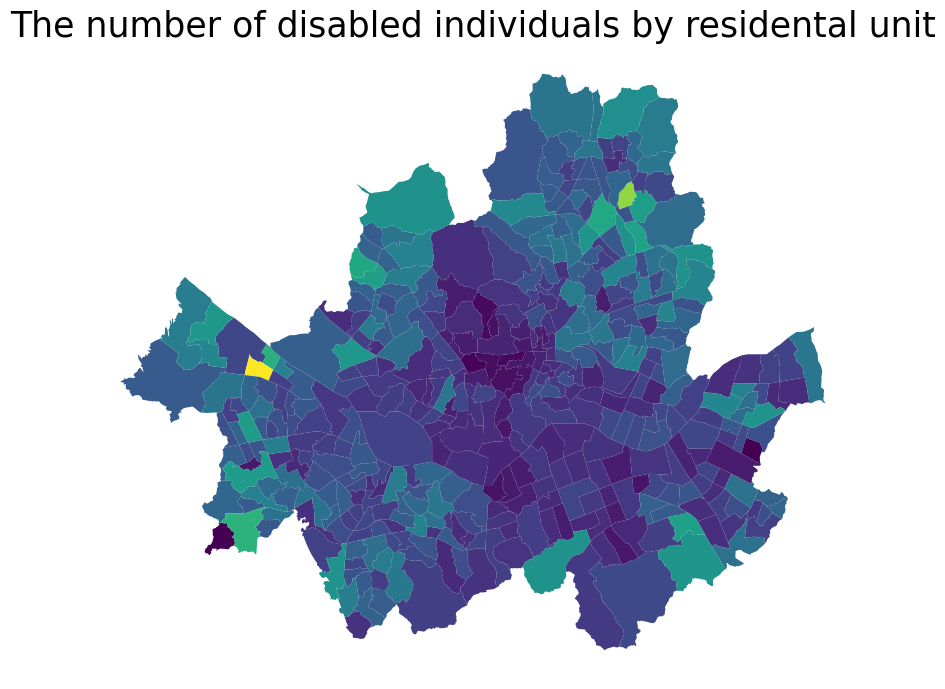

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = "D_ALL")
ax.axis("off")
ax.set_title("The number of disabled individuals by residental unit", fontdict = {'fontsize' : 25, 'fontweight' : 5})

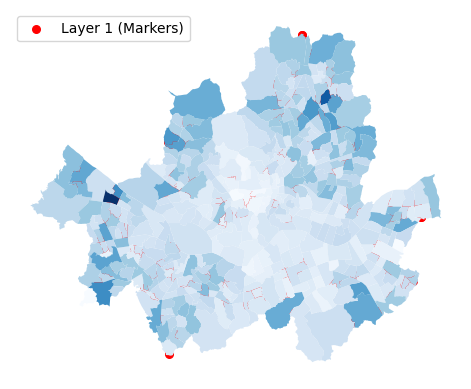

In [26]:
shapefile_path1 = "C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B402. 서울시 장애인시설 공간데이터/2. 파일데이터/2019/TL_DSPSN_FCLTY_ST_2019.shp"
shapefile_path2 = "C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B399. 서울시 행정동단위 장애인 등급별 현황 공간데이터/2. 파일데이터/2019/TL_DSPSN_DEG_ST_2020.shp"


gdf1 = gpd.read_file(shapefile_path1)
gdf2 = gpd.read_file(shapefile_path2)
ax = gdf1.plot(marker='o', color='red', markersize=30)  # Customize marker style
gdf2.plot(ax = ax, column = "D_ALL", cmap = "Blues")  # Customize color
ax.axis("off")
plt.legend(['Layer 1 (Markers)', 'Layer 2 (Colors)'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [1]:
existing_facilities = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B402. 서울시 장애인시설 공간데이터/2. 파일데이터/2019/TL_DSPSN_FCLTY_ST_2019.shp")
disabled_population_areas = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B399. 서울시 행정동단위 장애인 등급별 현황 공간데이터/2. 파일데이터/2019/TL_DSPSN_DEG_ST_2020.shp")

disabled_population_areas['Population_Density'] = disabled_population_areas['D_ALL'] / disabled_population_areas.geometry.area

high_density_no_facilities = disabled_population_areas[~disabled_population_areas.intersects(existing_facilities.unary_union)]

top_10_high_density_no_facilities = high_density_no_facilities.nlargest(10, 'Population_Density')
print(top_10_high_density_no_facilities)


fig, ax = plt.subplots(figsize=(12, 8))
existing_facilities.plot(ax=ax, color='green', label='Existing Facilities')
disabled_population_areas.plot(ax=ax, color='blue', alpha=0.5, label='Population Areas')
top_10_high_density_no_facilities.plot(ax=ax, color='yellow', alpha=0.7, label='Top 10 High-Density No Facilities')


ax.legend()
ax.set_title('Top 10 High-Density Areas with No Facilities')
plt.show()

NameError: name 'gpd' is not defined